# Linear Regression Machine Learning Model Project

###### The purpose of this project is to use linear regression to predict the final grade of a set of students based on numerous factors. The final Grade is captured as G3 and is currently in the dataset. We will use this final grade, along with some other metrics to judge the validity of our model

## Importing packages and reading in the data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle

In [2]:
# Getting Current Working Directory
os.getcwd()

'C:\\Users\\brenden.lemay'

In [4]:
# Changing Directory to Downloads folder by using relative reference. This increases the usability across machines
os.chdir('.\Downloads\student')

In [5]:
# Verifying Change
os.getcwd()

'C:\\Users\\brenden.lemay\\Downloads\\student'

In [6]:
# Reading in student data into a Pandas DataFrame
df = pd.read_csv('student-mat.csv', sep=';')

# Attributes for both student-mat.csv (Math course) dataset:
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
 
 
 ##### These grades are related with the course subject, Math:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

### Exploratory Data Analysis

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.shape

(395, 33)

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
# As we can see below, there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Deciding on Features to use for Linear Regression Model

In [97]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [140]:
data = df[[ 'age', 'Fedu',
       'traveltime', 'failures',  'famrel', 'Dalc',
       'Walc', 'G1', 'G2', 'G3']]

In [141]:
# let's take a look at this subset of the overall DataFrame
data.head()

,age,Fedu,traveltime,failures,famrel,Dalc,Walc,G1,G2,G3
0,18,4,2,0,4,1,1,5,6,6
1,17,1,1,0,5,1,1,5,5,6
2,15,1,1,3,4,2,3,7,8,10
3,15,2,1,0,3,1,1,15,14,15
4,16,3,1,0,4,1,2,6,10,10


In [142]:
predict = 'G3'

In [143]:
X = data.drop([predict], axis=1)
X.shape

(395, 9)

In [144]:
Y = np.array(data[predict])
Y.shape

(395,)

In [145]:
# Setting up the test/train split using 80% of the data to train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [146]:
x_train.shape

(316, 9)

In [147]:
y_train.shape

(316,)

In [148]:
linear = linear_model.LinearRegression()

In [149]:
linear.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
accuracy = linear.score(x_test, y_test)
print('accuracy percentage as float value ', accuracy)

accuracy percentage as float value  0.8845787910358703


## Using and testing the model against the final Grade

In [161]:
print("Coefficient: \n", linear.coef_)

Coefficient: 
 [-0.2305511  -0.10153993  0.09940014 -0.18778865  0.34675385 -0.06759435
  0.19761691  0.15593061  0.97220915]


In [162]:
print("Intercept: \n", linear.intercept_)

Intercept: 
 0.6117465983421067


In [153]:
predictions = linear.predict(x_test)

In [154]:
for x in range(len(predictions)):
    print("Model Predicted : ",predictions[x].round(2),"\n The variables we looked at were ", X.columns,"\n And the actual output was : ", y_test[x])

Model Predicted :  6.0 
 The variables we looked at were  Index(['age', 'Fedu', 'traveltime', 'failures', 'famrel', 'Dalc', 'Walc', 'G1',
       'G2'],
      dtype='object') 
 And the actual output was :  7
Model Predicted :  11.92 
 The variables we looked at were  Index(['age', 'Fedu', 'traveltime', 'failures', 'famrel', 'Dalc', 'Walc', 'G1',
       'G2'],
      dtype='object') 
 And the actual output was :  12
Model Predicted :  14.32 
 The variables we looked at were  Index(['age', 'Fedu', 'traveltime', 'failures', 'famrel', 'Dalc', 'Walc', 'G1',
       'G2'],
      dtype='object') 
 And the actual output was :  13
Model Predicted :  0.41 
 The variables we looked at were  Index(['age', 'Fedu', 'traveltime', 'failures', 'famrel', 'Dalc', 'Walc', 'G1',
       'G2'],
      dtype='object') 
 And the actual output was :  0
Model Predicted :  10.68 
 The variables we looked at were  Index(['age', 'Fedu', 'traveltime', 'failures', 'famrel', 'Dalc', 'Walc', 'G1',
       'G2'],
      dtype

# Saving Model in a pickle file

In [157]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [159]:
pickle_in = open("studentmodel.pickle","rb")

In [160]:
linear = pickle.load(pickle_in)

### Finding the best model by splitting the data and scoring the accuracy 1,000 times

In [167]:
best_score = 0
for _ in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    
    if accuracy > best_score:
        best_score = accuracy
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear,f)

0.8702035470819274
0.8564463021764908
0.8290505942025144
0.7483212453231217
0.7862683527795984
0.8418060339324752
0.8698329260266026
0.850624332194039
0.7339361950814065
0.7560821056205383
0.7348081839936147
0.7718865047565147
0.7843054577450952
0.85600822560653
0.7462621229817743
0.8489589293421128
0.8418506490261177
0.7850141270535154
0.8100505700829267
0.7478609194286745
0.8697299676780301
0.8796213453623805
0.7374780921428574
0.8842888754588477
0.8291027360515629
0.8024680467137664
0.8114824084997487
0.7970369911169722
0.7807530621987918
0.8065382806314283
0.8466891110428301
0.799243850142981
0.8522874453596836
0.7508048034488635
0.8401419812638715
0.8399536733482887
0.7858711707540829
0.7939437182981195
0.7520118789839898
0.855583129503924
0.8638029511349758
0.7842057030248019
0.8138115335513073
0.7940821594129808
0.8163093755472889
0.8846020474265579
0.8443148857117821
0.7723828704551879
0.802448220398528
0.8635677862036589
0.8524352423995145
0.7158772878767249
0.8051902654262725

### Plotting the data

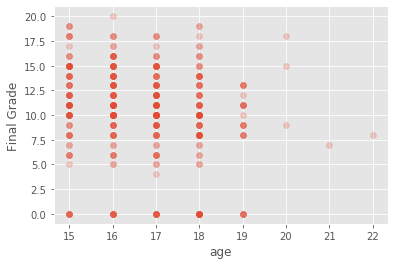

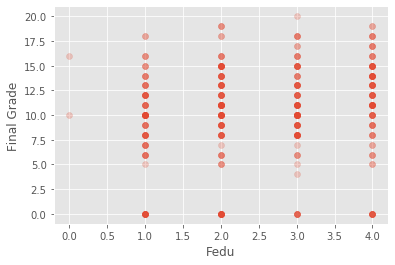

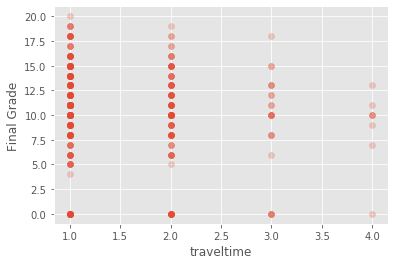

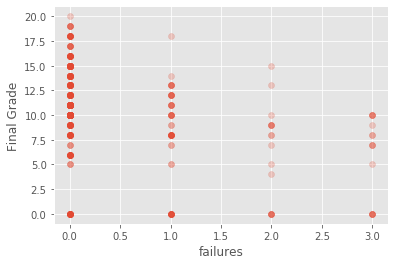

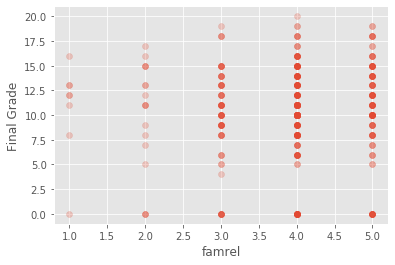

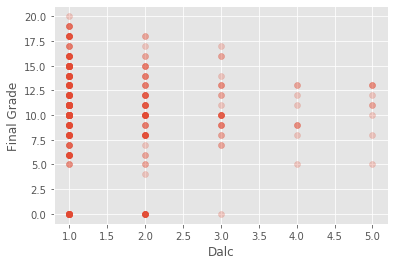

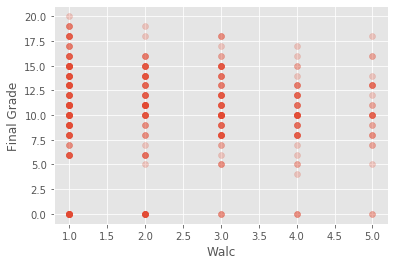

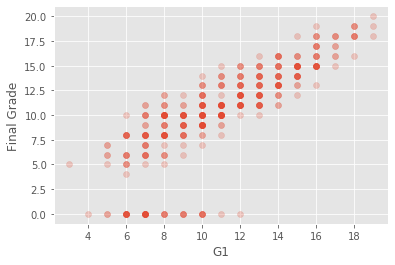

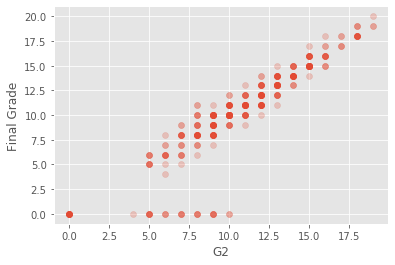

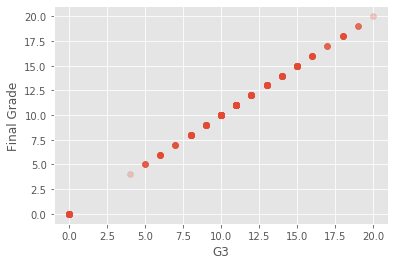

In [177]:
for p in data:
    plt.scatter(data[p], data['G3'], alpha = 0.25)
    plt.xlabel(p)
    plt.ylabel('Final Grade')
    plt.show()